# House Price prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
house_main = pd.read_csv("Maison.csv")
house=house_main.copy()

## EDA

In [137]:
house

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0


In [3]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [4]:
house

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0


In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      546 non-null    int64
 1   area       546 non-null    int64
 2   rooms      546 non-null    int64
 3   bathroom   546 non-null    int64
 4   floors     546 non-null    int64
 5   driveway   546 non-null    int64
 6   game_room  546 non-null    int64
 7   cellar     546 non-null    int64
 8   gas        546 non-null    int64
 9   air        546 non-null    int64
 10  garage     546 non-null    int64
 11  situation  546 non-null    int64
dtypes: int64(12)
memory usage: 55.5+ KB


In [11]:
house.isnull().sum()

price        0
area         0
rooms        0
bathroom     0
floors       0
driveway     0
game_room    0
cellar       0
gas          0
air          0
garage       0
situation    0
dtype: int64

In [9]:
house.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [36]:
## unique values in all the columns
# we will exclude price and area columns here as they have lot of unique values and no need to see them
for col in house.drop(columns=['price','area']):  
    print(col,': \n',house[col].unique())
    print(house[col].value_counts(),'\n')

rooms : 
 [3 2 4 1 5 6]
3    301
2    136
4     95
5     10
1      2
6      2
Name: rooms, dtype: int64 

bathroom : 
 [1 2 3 4]
1    402
2    133
3     10
4      1
Name: bathroom, dtype: int64 

floors : 
 [2 1 3 4]
2    238
1    227
4     41
3     40
Name: floors, dtype: int64 

driveway : 
 [1 0]
1    469
0     77
Name: driveway, dtype: int64 

game_room : 
 [0 1]
0    449
1     97
Name: game_room, dtype: int64 

cellar : 
 [1 0]
0    355
1    191
Name: cellar, dtype: int64 

gas : 
 [0 1]
0    521
1     25
Name: gas, dtype: int64 

air : 
 [0 1]
0    373
1    173
Name: air, dtype: int64 

garage : 
 [1 0 2 3]
0    300
1    126
2    108
3     12
Name: garage, dtype: int64 

situation : 
 [0 1]
0    418
1    128
Name: situation, dtype: int64 



### Correlation check

In [20]:
house.corr()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074
area,0.535796,1.000000,0.151851,0.193833,0.083675,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782
rooms,0.366447,0.151851,1.000000,0.373769,0.407974,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953
bathroom,0.516719,0.193833,0.373769,1.000000,0.324066,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013
floors,0.421190,0.083675,0.407974,0.324066,1.000000,0.122499,0.042281,-0.173860,0.018261,0.296216,0.043412,0.042940
driveway,0.297167,0.288778,-0.011996,0.041955,0.122499,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378
game_room,0.254960,0.140327,0.080492,0.126892,0.042281,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292
cellar,0.186218,0.047487,0.097201,0.102791,-0.173860,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651
gas,0.092837,-0.009201,0.046028,0.067365,0.018261,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170
air,0.453347,0.221765,0.160412,0.184955,0.296216,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626


<AxesSubplot:>

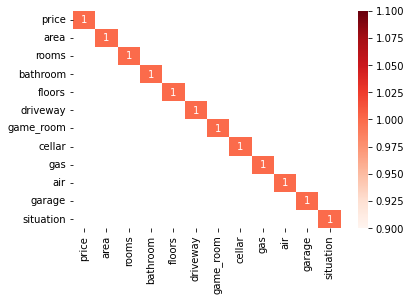

In [22]:
corr_matrix = house.corr()

var_above_thresh = corr_matrix[(abs(corr_matrix)>=.75)]
sns.heatmap(var_above_thresh, cmap="Reds",annot=True)

In [ ]:
## so we have no highly correlated variables

### .

In [24]:
house['area'].describe()

count      546.000000
mean      5150.265568
std       2168.158725
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

<AxesSubplot:xlabel='area'>

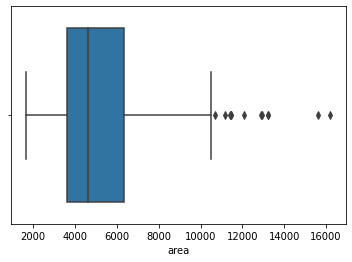

In [25]:
sns.boxplot(x='area',data=house)

<AxesSubplot:xlabel='price'>

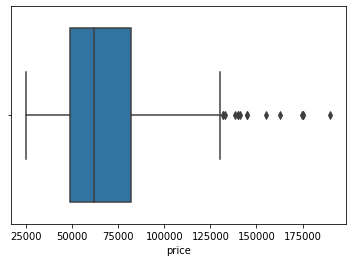

In [37]:
sns.boxplot(x='price',data=house)

C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

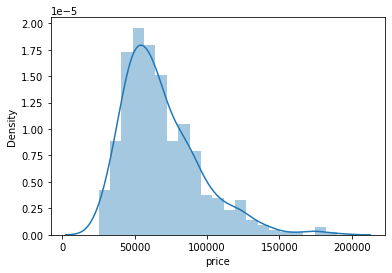

In [41]:
sns.distplot(house['price'])

In [ ]:
### relation with the target variable

<AxesSubplot:xlabel='area', ylabel='price'>

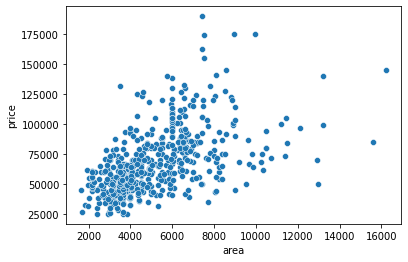

In [38]:
sns.scatterplot(x='area',y='price',data=house)  ## we can see couple of outliers in the following plot

<AxesSubplot:xlabel='game_room', ylabel='price'>

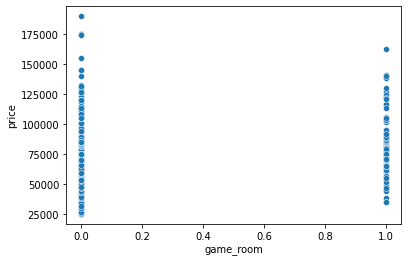

In [44]:
sns.scatterplot(x='game_room',y='price',data=house)  ## this suggests that game_room doesnt quite affect the price value, as the range looks similar for both cases. Let us evaluate it a bit more

In [50]:
house.loc[house['game_room']==0, 'price'].describe()

count       449.000000
mean      64960.115813
std       26085.906827
min       25000.000000
25%       47900.000000
50%       59500.000000
75%       75500.000000
max      190000.000000
Name: price, dtype: float64

In [51]:
house.loc[house['game_room']==1, 'price'].describe()

count        97.000000
mean      82755.670103
std       24683.267439
min       35000.000000
25%       67000.000000
50%       78500.000000
75%       91700.000000
max      163000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='rooms', ylabel='price'>

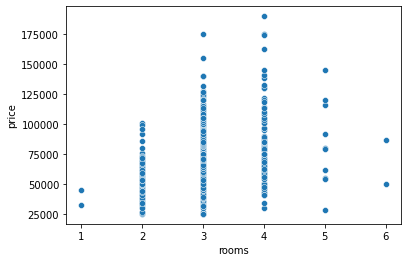

In [40]:
sns.scatterplot(x='rooms',y='price',data=house)

<AxesSubplot:xlabel='gas', ylabel='price'>

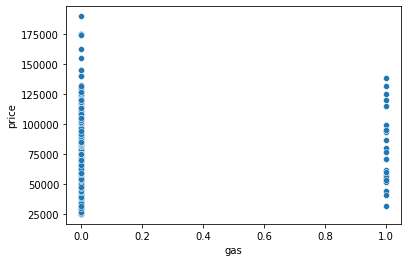

In [52]:
sns.scatterplot(x='gas',y='price',data=house)  

In [53]:
house.loc[house['gas']==0, 'price'].describe()

count       521.000000
mean      67579.063340
std       26424.429043
min       25000.000000
25%       49000.000000
50%       62000.000000
75%       82000.000000
max      190000.000000
Name: price, dtype: float64

In [54]:
house.loc[house['gas']==1, 'price'].describe()

count        25.000000
mean      79428.000000
std       30388.683749
min       32000.000000
25%       54000.000000
50%       76900.000000
75%       95000.000000
max      138300.000000
Name: price, dtype: float64

### Flooring and capping

### area column

In [5]:
Q1 = np.percentile(house['area'], 25)   #25th percentile  
Q3 = np.percentile(house['area'], 75)   #75th percentile
IQR = Q3 - Q1

In [6]:
nfifth = np.percentile(house['area'], 95)  #95th percentile
fifth = np.percentile(house['area'], 5)    #5th percentile

#### method 1

Replacing outliers with Q3+1.5xIQR and Q1-1.5xIQR

In [7]:
upper = np.where(house['area'] >= (Q3+1.5*IQR))
lower = np.where(house['area'] <= (Q1-1.5*IQR))

df1=house.copy()

df1.loc[upper[0],'area']=Q3+1.5*IQR
df1.loc[lower[0],'area']=Q1-1.5*IQR

#### method 2

Replacing outliers with 95th percentile and 5th percentile values

In [8]:
upper = np.where(house['area'] >= nfifth)
lower = np.where(house['area'] <= fifth)

df2=house.copy()

df2.loc[upper[0],'area']=nfifth
df2.loc[lower[0],'area']=fifth

#### method 3

Replacing outliers with 75th and 25th percentile values

In [9]:
upper = np.where(house['area'] >= Q3)
lower = np.where(house['area'] <= Q1)

df3=house.copy()

df3.loc[upper[0],'area']=Q3
df3.loc[lower[0],'area']=Q1

### price column

In [10]:
Q1 = np.percentile(house['price'], 25)   #25th percentile  
Q3 = np.percentile(house['price'], 75)   #75th percentile
IQR = Q3 - Q1

In [11]:
nfifth = np.percentile(house['price'], 95)  #95th percentile
fifth = np.percentile(house['price'], 5)    #5th percentile

#### method 1

Replacing outliers with Q3+1.5xIQR and Q1-1.5xIQR

In [12]:
upper = np.where(house['price'] >= (Q3+1.5*IQR))
lower = np.where(house['price'] <= (Q1-1.5*IQR))

df_p1=df3.copy()  ## method 3 for area is giving best accuracy

df_p1.loc[upper[0],'price']=Q3+1.5*IQR
df_p1.loc[lower[0],'price']=Q1-1.5*IQR

#### method 2

Replacing outliers with 95th percentile and 5th percentile values

In [13]:
upper = np.where(house['price'] >= nfifth)
lower = np.where(house['price'] <= fifth)

df_p2=df3.copy()

df_p2.loc[upper[0],'price']=nfifth
df_p2.loc[lower[0],'price']=fifth

#### method 3

Replacing outliers with 75th and 25th percentile values

In [14]:
upper = np.where(house['price'] >= Q3)
lower = np.where(house['price'] <= Q1)

df_p3=df3.copy()

df_p3.loc[upper[0],'price']=Q3
df_p3.loc[lower[0],'price']=Q1

### rooms column

C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rooms'>

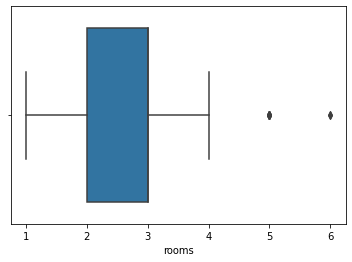

In [15]:
sns.boxplot(house['rooms'])

In [16]:
Q1 = np.percentile(house['rooms'], 25)   #25th percentile  
Q3 = np.percentile(house['rooms'], 75)   #75th percentile
IQR = Q3 - Q1

nfifth = np.percentile(house['rooms'], 95)  #95th percentile
fifth = np.percentile(house['rooms'], 5)    #5th percentile

#### method 1

Replacing outliers with Q3+1.5xIQR and Q1-1.5xIQR

In [17]:
upper = np.where(house['rooms'] >= (Q3+1.5*IQR))
lower = np.where(house['rooms'] <= (Q1-1.5*IQR))

df_r1=df_p2.copy()  # method 2 for price column gives best accuracy

df_r1.loc[upper[0],'rooms']=Q3+1.5*IQR
df_r1.loc[lower[0],'rooms']=Q1-1.5*IQR

#### method 2

Replacing outliers with 95th percentile and 5th percentile values

In [18]:
upper = np.where(house['rooms'] >= nfifth)
lower = np.where(house['rooms'] <= fifth)

df_r2=df_p2.copy()

df_r2.loc[upper[0],'rooms']=nfifth
df_r2.loc[lower[0],'rooms']=fifth

#### method 3

Replacing outliers with 75th and 25th percentile values

In [19]:
upper = np.where(house['rooms'] >= Q3)
lower = np.where(house['rooms'] <= Q1)

df_r3=df_p2.copy()

df_r3.loc[upper[0],'rooms']=Q3
df_r3.loc[lower[0],'rooms']=Q1

### floors column

C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floors'>

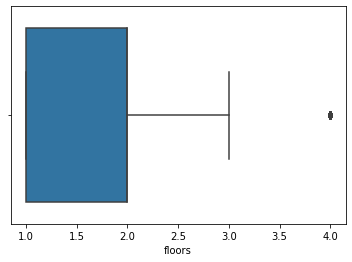

In [20]:
sns.boxplot(house['floors'])

<AxesSubplot:xlabel='floors', ylabel='price'>

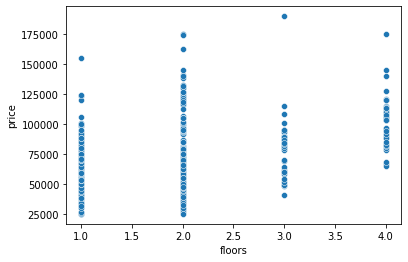

In [21]:
sns.scatterplot(x='floors',y='price',data=house)

In [22]:
Q1 = np.percentile(house['floors'], 25)   #25th percentile  
Q3 = np.percentile(house['floors'], 75)   #75th percentile
IQR = Q3 - Q1

nfifth = np.percentile(house['floors'], 95)  #95th percentile
fifth = np.percentile(house['floors'], 5)    #5th percentile

In [546]:
Q3

2.0

In [547]:
nfifth  ## cant use this as this is the outlier value

4.0

In [23]:
df11=df_r3.copy()  #method 3 for rooms column is giving best accuracy
df11.drop(df11[df11['floors'] == 4].index, inplace=True)    ## we will also test if dropping the outliers increase the accuracy

#### method 1

Replacing outliers with Q3+1.5xIQR and Q1-1.5xIQR

In [24]:
upper = np.where(house['floors'] >= (Q3+1.5*IQR))
lower = np.where(house['floors'] <= (Q1-1.5*IQR))

df_f1=df_r3.copy()

df_f1.loc[upper[0],'floors']=Q3+1.5*IQR
df_f1.loc[lower[0],'floors']=Q1-1.5*IQR

#### method 2

Replacing outliers with 75th and 25th percentile values

In [25]:
upper = np.where(house['floors'] >= Q3)
lower = np.where(house['floors'] <= Q1)

df_f2=df_r3.copy()

df_f2.loc[upper[0],'floors']=Q3
df_f2.loc[lower[0],'floors']=Q1

## Model without outlier treatment

In [26]:
## Feature scaling

In [27]:
house1=house.copy()

In [28]:
data = house1.iloc[::].values  ## standardization of the data
from sklearn import preprocessing
house1_standardized = preprocessing.scale(data)
house1_standardized = pd.DataFrame(house1_standardized)

In [29]:
house1_standardized = house1_standardized.rename(columns = {0:'price',1: 'area',2: 'rooms', 
                         3: 'bathroom', 4: 'floors',5: 'driveway',
                         6:'game_room', 7: 'cellar', 
                         8: 'gas', 9:'air', 10: 'garage', 11: 'situation'})

In [30]:
# house1_standardized

In [31]:
X = house1_standardized[['area', 'rooms', 'bathroom', 'floors', 'driveway','game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house1_standardized['price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1000)

In [33]:
X_endog = sm.add_constant(X_test)
res = sm.OLS(y_test, X_endog)
olsmod=res.fit()

In [34]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     31.45
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           8.83e-34
Time:                        19:21:15   Log-Likelihood:                -153.13
No. Observations:                 164   AIC:                             330.3
Df Residuals:                     152   BIC:                             367.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0920      0.051      1.813      0.072      -0.008       0.192
area           0.2844      0.052      5.421      0.000       0.181       0.388
rooms         -0.0138      0.062     -0.223      0.823      -0.135       0.108
bathroom       0.3544      0.060      5.877      0.000       0.235       0.474
floors         0.2911      0.066      4.389      0.000       0.160       0.422
driveway       0.0613      0.057      1.082      0.281      -0.051       0.173
game_room      0.0742      0.057      1.307      0.193      -0.038       0.186
cellar         0.0499      0.062      0.810      0.419      -0.072       0.172
gas            0.1552      0.054      2.880      0.005       0.049       0.262
air            0.2074      0.056      3.693      0.000       0.096       0.318
garage         0.2159      0.058      3.746      0.000       0.102       0.330
situation      0.2435      0.057      4.285      0.000       0.131       0.356
==============================================================================
Omnibus:                       44.641   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.776
Skew:                           1.121   Prob(JB):                     1.19e-25
Kurtosis:                       6.431   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model after outlier treatment

In [35]:
## method 3 for area, method 2 for price and method 3 for rooms

### dropping the floors column outliers

In [36]:
data = df11.iloc[::].values  #standardize the data to normal distribution
from sklearn import preprocessing
house1_standardized = preprocessing.scale(data)
house1_standardized = pd.DataFrame(house1_standardized)

house1_standardized = house1_standardized.rename(columns = {0:'price',1: 'area',2: 'rooms', 
                         3: 'bathroom', 4: 'floors',5: 'driveway',
                         6:'game_room', 7: 'cellar', 
                         8: 'gas', 9:'air', 10: 'garage', 11: 'situation'})

In [37]:
X = house1_standardized[['area', 'rooms', 'bathroom', 'floors', 'driveway','game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house1_standardized['price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1000)

In [39]:
X_endog = sm.add_constant(X_test)
res = sm.OLS(y_test, X_endog)
olsmod=res.fit()

In [40]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     22.65
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           5.25e-26
Time:                        19:21:26   Log-Likelihood:                -132.14
No. Observations:                 152   AIC:                             288.3
Df Residuals:                     140   BIC:                             324.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0117      0.050     -0.236      0.814      -0.110       0.087
area           0.2623      0.061      4.323      0.000       0.142       0.382
rooms          0.1069      0.058      1.852      0.066      -0.007       0.221
bathroom       0.2064      0.055      3.744      0.000       0.097       0.315
floors         0.1495      0.060      2.508      0.013       0.032       0.267
driveway       0.1551      0.056      2.753      0.007       0.044       0.267
game_room      0.0712      0.057      1.249      0.214      -0.042       0.184
cellar         0.0967      0.062      1.559      0.121      -0.026       0.219
gas            0.1506      0.055      2.726      0.007       0.041       0.260
air            0.2153      0.053      4.049      0.000       0.110       0.320
garage         0.0919      0.056      1.649      0.101      -0.018       0.202
situation      0.1890      0.054      3.477      0.001       0.082       0.296
==============================================================================
Omnibus:                       19.949   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.043
Skew:                           0.622   Prob(JB):                     1.49e-08
Kurtosis:                       5.036   Cond. No.                         2.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### flooring and caping the floors column outliers

In [41]:
data = df_f2.iloc[::].values  #standardize the data to normal distribution
from sklearn import preprocessing
house1_standardized = preprocessing.scale(data)
house1_standardized = pd.DataFrame(house1_standardized)

house1_standardized = house1_standardized.rename(columns = {0:'price',1: 'area',2: 'rooms', 
                         3: 'bathroom', 4: 'floors',5: 'driveway',
                         6:'game_room', 7: 'cellar', 
                         8: 'gas', 9:'air', 10: 'garage', 11: 'situation'})

In [42]:
X = house1_standardized[['area', 'rooms', 'bathroom', 'floors', 'driveway','game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house1_standardized['price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1000)

In [44]:
X_endog = sm.add_constant(X_test)
res = sm.OLS(y_test, X_endog)
olsmod=res.fit()

In [45]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     33.77
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.17e-35
Time:                        19:21:39   Log-Likelihood:                -140.12
No. Observations:                 164   AIC:                             304.2
Df Residuals:                     152   BIC:                             341.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0578      0.047      1.239      0.217      -0.034       0.150
area           0.3222      0.058      5.519      0.000       0.207       0.438
rooms          0.0497      0.063      0.794      0.429      -0.074       0.173
bathroom       0.3522      0.054      6.547      0.000       0.246       0.458
floors         0.1553      0.063      2.471      0.015       0.031       0.279
driveway       0.1048      0.052      2.005      0.047       0.002       0.208
game_room      0.0782      0.053      1.466      0.145      -0.027       0.183
cellar         0.0019      0.056      0.033      0.974      -0.109       0.113
gas            0.2071      0.050      4.165      0.000       0.109       0.305
air            0.2189      0.052      4.205      0.000       0.116       0.322
garage         0.1687      0.053      3.169      0.002       0.064       0.274
situation      0.1624      0.055      2.938      0.004       0.053       0.272
==============================================================================
Omnibus:                       15.494   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.987
Skew:                           0.482   Prob(JB):                     2.27e-06
Kurtosis:                       4.695   Cond. No.                         2.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
## the accuracy is better than removing the floors column outliers

### without treating the floors column outlier

In [47]:
data = df_r3.iloc[::].values  #standardize the data to normal distribution
from sklearn import preprocessing
house1_standardized = preprocessing.scale(data)
house1_standardized = pd.DataFrame(house1_standardized)

house1_standardized = house1_standardized.rename(columns = {0:'price',1: 'area',2: 'rooms', 
                         3: 'bathroom', 4: 'floors',5: 'driveway',
                         6:'game_room', 7: 'cellar', 
                         8: 'gas', 9:'air', 10: 'garage', 11: 'situation'})

In [48]:
X = house1_standardized[['area', 'rooms', 'bathroom', 'floors', 'driveway','game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house1_standardized['price']

In [71]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1000)

In [72]:
X_endog = sm.add_constant(X_test)
res = sm.OLS(y_test, X_endog)
olsmod=res.fit()

In [73]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     36.64
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.83e-37
Time:                        19:24:31   Log-Likelihood:                -135.33
No. Observations:                 164   AIC:                             294.7
Df Residuals:                     152   BIC:                             331.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0743      0.045      1.633      0.105      -0.016       0.164
area           0.2929      0.055      5.283      0.000       0.183       0.402
rooms          0.0374      0.056      0.673      0.502      -0.072       0.147
bathroom       0.3374      0.052      6.495      0.000       0.235       0.440
floors         0.2458      0.062      3.952      0.000       0.123       0.369
driveway       0.0952      0.051      1.873      0.063      -0.005       0.196
game_room      0.0737      0.052      1.424      0.157      -0.029       0.176
cellar         0.0406      0.056      0.723      0.471      -0.070       0.152
gas            0.1988      0.048      4.121      0.000       0.103       0.294
air            0.1865      0.052      3.621      0.000       0.085       0.288
garage         0.1879      0.052      3.608      0.000       0.085       0.291
situation      0.1638      0.054      3.055      0.003       0.058       0.270
==============================================================================
Omnibus:                       21.103   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.514
Skew:                           0.583   Prob(JB):                     5.86e-10
Kurtosis:                       5.205   Cond. No.                         2.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
## so treatment of floor outliers reduces accuracy and dropping those outliers also
## so this is our final model with an accuracy of 72.6

In [580]:
ypred = olsmod.predict(X_endog)

<AxesSubplot:ylabel='price'>

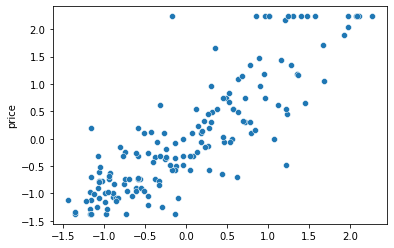

In [581]:
sns.scatterplot(x=ypred,y=y_test)

In [582]:
## Using sklearn

In [583]:
lm = LinearRegression()
lm.fit(X_test,y_test)

LinearRegression()

In [584]:
print(lm.coef_)

[0.29287617 0.03737611 0.337443   0.24581731 0.09516412 0.07369108
 0.04060649 0.19878164 0.18650454 0.18788573 0.16384694]


In [585]:
predictions = lm.predict(X_test)

In [586]:
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 0.4014874186114501
MSE : 0.30497679470057926
RMSE : 0.5522470413687874


<AxesSubplot:ylabel='price'>

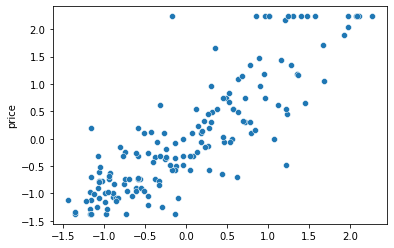

In [587]:
sns.scatterplot(x=predictions,y=y_test)

In [588]:
print("R2:", lm.score(X_test, y_test))

R2: 0.7261279602856998
